# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

2024-07-31 02:38:19.339650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-31 02:38:19.339676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

#### My Answer:

1. I have chosen the book review dataset. 
2. I will be predicting if the review is a positive review or not, this would be my label.
3. This would be a binary classification problem that is supervised.
4. There is only one feature for this problem, that is the review column. The words in the review will be used to predict the label.
5. Instead of having employees go through each review to identify if it is positive or not, using a ML NLP model would be much faster and cost-saving. So the NLP model would have to be trained in order to understand the sentiment behind a text, so as to classify it as either a negative or positive review.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [4]:
counts = df['Positive Review'].value_counts()
print(counts)

False    993
True     980
Name: Positive Review, dtype: int64


The true and false examples are evenly split, so this reduces the possibility of any bias that the model might develop.

In [5]:
#first, assign the feature (y) and the label(x)
#preparing the data for TF-IDF vectorization
y = df['Positive Review']
X = df['Review']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

In [7]:
print(X_train.shape)
print(X_train.dtypes)
print()
print(X_test.shape)
print(X_test.dtypes)

(1479,)
object

(494,)
object


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### My answer:

To prepare the data, I split the feature and the label into two variables and now I will use TF-IDF vectorizer to transform the features into numerical vectors, so that it is easier to use for training and testing with the neural network. My model is a neural network, specifically an NLP model. My next steps would be to construct the neural network model, get the optimization and loss function, compile the model, fit the model using the new transformed training data, and visualize the loss and the accuracy of training and validation to evaluate the performance. Then I would use the trained model to make predictions on the new transformed test set. Now, after the training and the prediction process is complete, I will take a different approach from previous assignments and use a confusion matrix, precision-recall curve, and other ways of evaluating the performance of this NLP model that I am creating. I will also create another NLP model where I will use a dropout layer, then I will follow the same steps again, generate the confusion matrix and etc, and then analyze the results. So my goal is to get a good model for my ML task, so that means analyzing what I can do to make the NLP model different from its original set up. Through different testing, I just decided to see how different the NLP models can be when one has a dropout layer (with a rate of 0.25). 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [46]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### Use TF-IDF vectorizer to transform the text

In [9]:
#doing this will transform the text, so that computers are able to interpret it easier
#create tfidf vectorizer object
tfidf_vectorizer = TfidfVectorizer()

#fitting vectorizer for X_train
tfidf_vectorizer.fit(X_train)

#transform the label data / both training and testing
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
#this is where the dimension of the training examples are identified
vocab_size = len(tfidf_vectorizer.vocabulary_)

print(vocab_size)

18558


#### Creating the neural network structure

In [11]:
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(vocab_size,))
nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1187776   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,190,401
Trainable params: 1,190,401
Non-trainable params: 0
_________________________________________________________________


2024-07-31 02:38:28.468207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-31 02:38:28.468232: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-31 02:38:28.468300: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-06f1565561d4c9810): /proc/driver/nvidia/version does not exist
2024-07-31 02:38:28.468498: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Optimization and loss function

In [12]:
#optimizer
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

#loss
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

#### Compiling the model

In [13]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

#### Fitting Model 

using this prog bar function from a past assignment

In [14]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
        
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [15]:
t0 = time.time()
num_epochs = 55 #test out different epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time()

print('Elapsed time: %.2fs' % (t1-t0))

2024-07-31 02:38:30.082855: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-31 02:38:30.086116: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649990000 Hz


Epoch [5/ 55], Loss: 0.6900, Accuracy: 0.5309, Val_loss: 0.6915, Val_accuracy: 0.5203
Epoch [10/ 55], Loss: 0.6742, Accuracy: 0.7210, Val_loss: 0.6784, Val_accuracy: 0.7297
Epoch [15/ 55], Loss: 0.5783, Accuracy: 0.7151, Val_loss: 0.8894, Val_accuracy: 0.4899
Epoch [20/ 55], Loss: 0.4653, Accuracy: 0.7853, Val_loss: 0.4769, Val_accuracy: 0.7973
Epoch [25/ 55], Loss: 0.3164, Accuracy: 0.8597, Val_loss: 1.0080, Val_accuracy: 0.5405
Epoch [30/ 55], Loss: 0.0536, Accuracy: 0.9932, Val_loss: 0.4062, Val_accuracy: 0.8007
Epoch [35/ 55], Loss: 0.0089, Accuracy: 1.0000, Val_loss: 0.4497, Val_accuracy: 0.8074
Epoch [40/ 55], Loss: 0.0040, Accuracy: 1.0000, Val_loss: 0.4799, Val_accuracy: 0.8041
Epoch [45/ 55], Loss: 0.0024, Accuracy: 1.0000, Val_loss: 0.5014, Val_accuracy: 0.8176
Epoch [50/ 55], Loss: 0.0017, Accuracy: 1.0000, Val_loss: 0.5167, Val_accuracy: 0.8176
Epoch [55/ 55], Loss: 0.0013, Accuracy: 1.0000, Val_loss: 0.5297, Val_accuracy: 0.8176
Elapsed time: 5.23s


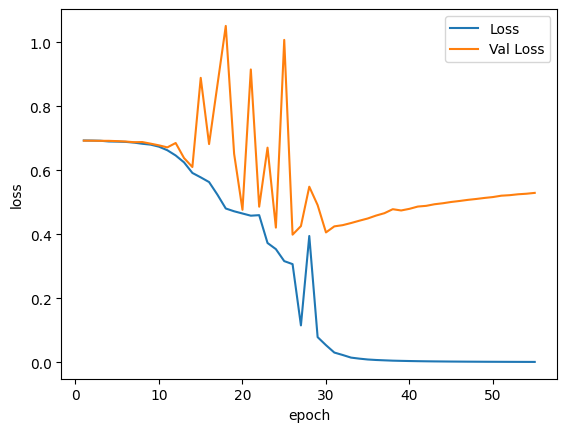

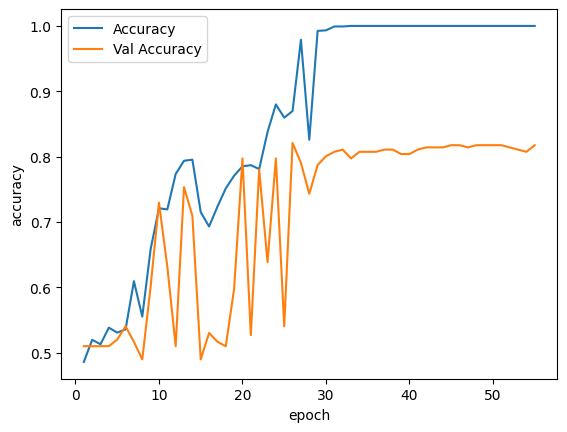

In [16]:
# Plot training and validation loss
plt.ylabel('loss')
plt.xlabel('epoch')

plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'],label='Val Loss')

plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'],label='Val Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()
plt.show()



#### Evaluation of the model

In [17]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 985us/step - loss: 0.5640 - accuracy: 0.8178
Loss:  0.5640233755111694 Accuracy:  0.8178137540817261


#### Prediction

In [18]:
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

goodReviews = [True if prob >= 0.5 else False for prob in probability_predictions]
# use y test.tonumpy()??

#### Confusion Matrix

In [19]:
c_m = confusion_matrix(y_test, goodReviews, labels=[True,False])

pd.DataFrame(
c_m,
columns=['Predicted: Bad Book', 'Predicted: Good Book'],
index=['Actual: Bad Book', 'Actual: Good Book']
)

,Predicted: Bad Book,Predicted: Good Book
Actual: Bad Book,214,43
Actual: Good Book,47,190


### **Analysis of confusion matrix 1:**
Looks like the model is pretty accurate withs its predictions. 
1. 404 predictions were correct, while 90 predictions were wrong.

**Notice that the training accuracy is 100% but the
validation accuracy is around 80%. This indicates that our model is overfitting; it will not perform
as well on new, previously unseen data as it did during training. We want to have an accurate idea
of how well our model will generalize to new data.

The precision-recall curve will be created after the second model is done with predictions. But now, we will get the ROC-AUC curve.


In [20]:
precision_default, recall_default, thresholds_default=precision_recall_curve(y_test, goodReviews)
#creating these variables for later on when the combined graph is created

In [21]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test,goodReviews)
#creating this for later

Next steps:
1. Create another NLP model WITH dropout layer
2. Prediction and evaluation of the model
3. Do confusion matrix again
4. Compare the results using the generated matrix
    

### **Creating the second NLP Model**



In [34]:
nn_model2 = keras.Sequential()

input_layer2 = keras.layers.InputLayer(input_shape=(vocab_size,))
nn_model2.add(input_layer2)

nn_model.add(keras.layers.Dropout(.25))#using rate of 50% for now

hidden_layer_12 = keras.layers.Dense(units=64, activation='relu')
nn_model2.add(hidden_layer_12)

hidden_layer_22 = keras.layers.Dense(units=32, activation='relu')
nn_model2.add(hidden_layer_22)

hidden_layer_32 = keras.layers.Dense(units=16, activation='relu')
nn_model2.add(hidden_layer_32)

output_layer2 = keras.layers.Dense(units=1, activation='sigmoid')
nn_model2.add(output_layer2)

nn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1187776   
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,190,401
Trainable params: 1,190,401
Non-trainable params: 0
_________________________________________________________________


In [35]:
nn_model2.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy']) ##using the same optimizer, loss

In [36]:
t0 = time.time()
num_epochs2 = 55 #test out different epochs

history2 = nn_model2.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs2, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time()

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 55], Loss: 0.6872, Accuracy: 0.5731, Val_loss: 0.6928, Val_accuracy: 0.5101
Epoch [10/ 55], Loss: 0.6452, Accuracy: 0.7337, Val_loss: 0.6595, Val_accuracy: 0.5169
Epoch [15/ 55], Loss: 0.4884, Accuracy: 0.7540, Val_loss: 1.1741, Val_accuracy: 0.5101
Epoch [20/ 55], Loss: 0.3440, Accuracy: 0.8622, Val_loss: 0.5668, Val_accuracy: 0.7196
Epoch [25/ 55], Loss: 0.2767, Accuracy: 0.9045, Val_loss: 0.3941, Val_accuracy: 0.8209
Epoch [30/ 55], Loss: 0.0236, Accuracy: 1.0000, Val_loss: 0.4222, Val_accuracy: 0.8176
Epoch [35/ 55], Loss: 0.0063, Accuracy: 1.0000, Val_loss: 0.4830, Val_accuracy: 0.8108
Epoch [40/ 55], Loss: 0.0033, Accuracy: 1.0000, Val_loss: 0.4935, Val_accuracy: 0.8209
Epoch [45/ 55], Loss: 0.0021, Accuracy: 1.0000, Val_loss: 0.5237, Val_accuracy: 0.8108
Epoch [50/ 55], Loss: 0.0015, Accuracy: 1.0000, Val_loss: 0.5218, Val_accuracy: 0.8176
Epoch [55/ 55], Loss: 0.0012, Accuracy: 1.0000, Val_loss: 0.5351, Val_accuracy: 0.8209
Elapsed time: 5.06s


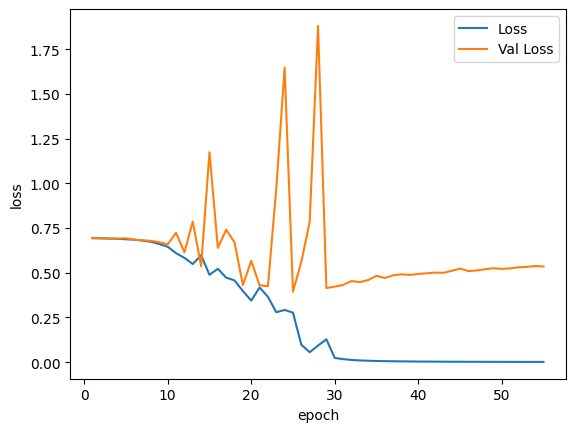

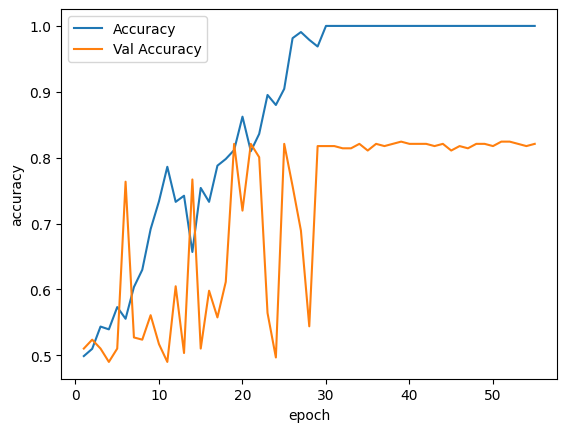

In [37]:
# Plot training and validation loss
plt.ylabel('loss')
plt.xlabel('epoch')

plt.plot(range(1, num_epochs2 + 1), history2.history['loss'], label='Loss')
plt.plot(range(1, num_epochs2 + 1), history2.history['val_loss'],label='Val Loss')

plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs2 + 1), history2.history['accuracy'], label='Accuracy')
plt.plot(range(1, num_epochs2 + 1), history2.history['val_accuracy'],label='Val Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()
plt.show()



In [38]:
loss, accuracy = nn_model2.evaluate(X_test_tfidf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.8219
Loss:  0.5563998818397522 Accuracy:  0.8218623399734497


In [39]:
probability_predictions2 = nn_model2.predict(X_test_tfidf.toarray())

goodReviews2 = [True if prob >= 0.5 else False for prob in probability_predictions2]
# use y test.tonumpy()??

In [40]:
c_m2 = confusion_matrix(y_test, goodReviews2, labels=[True,False])

pd.DataFrame(
c_m2,
columns=['Predicted: Bad Book', 'Predicted: Good Book'],
index=['Actual: Bad Book', 'Actual: Good Book']
)

,Predicted: Bad Book,Predicted: Good Book
Actual: Bad Book,211,46
Actual: Good Book,42,195


### **Analysis of confusion matrix 2:**

Looks like the NLP model with dropout performed slightly better with..

1. 406 predictions were correct, while 88 predictions were wrong.

Though its not shown here on the jupyter notebook, i did try using different epochs in order to try to make the performance for this model better, but it seems that 55 is the optimal value. Like when having a 100 epochs, it seemed that the model was becoming more overfitted. While decreasing it made it seem more underfitted.


In [41]:
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, goodReviews2)

In [42]:
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, goodReviews2)

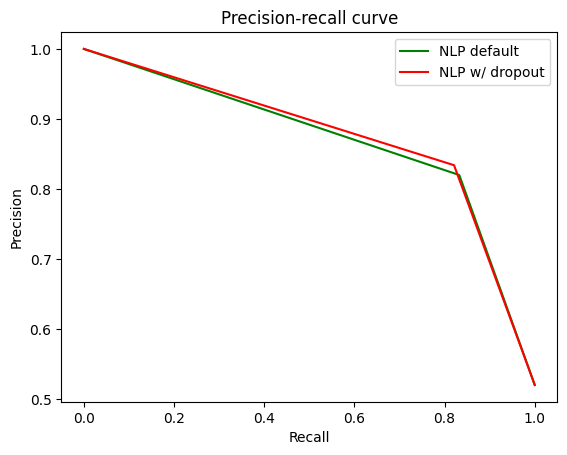

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=recall_default, y=precision_default, color='g', label ='NLP default')
sns.lineplot(x=recall_best, y=precision_best, color='r',label = 'NLP w/ dropout')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

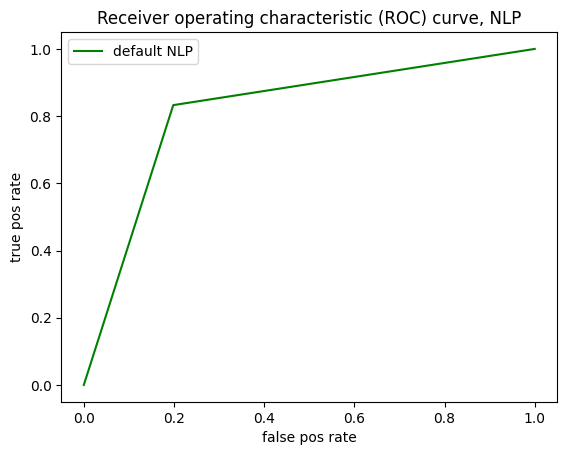

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_default, y=tpr_default, color='g')

plt.title("Receiver operating characteristic (ROC) curve, NLP")
plt.xlabel("false pos rate")
plt.ylabel("true pos rate")
plt.legend(['default NLP'])

plt.show()

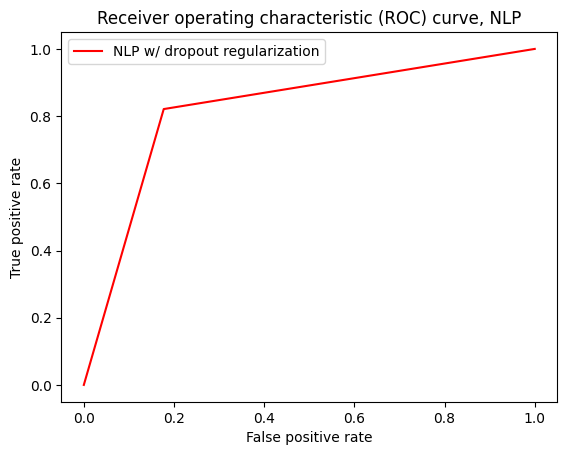

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_best, y=tpr_best, color='r')

plt.title("Receiver operating characteristic (ROC) curve, NLP")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['NLP w/ dropout regularization'])

plt.show()

In [48]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)


print(auc_default)
print(auc_best)

0.817186294307902
0.8218982416391665


### Analysis of the evaluation tests done above:

The auc values for the NLP model w/ dropout regularation shows a value that is bigger than that of the default NLP. This suggests that this NLP model is better than the default one, due to the addition of the dropout regularization. The ROC curves look pretty much the same. Though there is a difference between the two models when looking at the precision-recall graph. There is a small difference where the red line seems to be higher than the green one around recall value of 0.8. This could suggest a betterment in performance.